## Engajamento dos colaboradores na pesquisa de clima organizacional
---
Analisar o engajamento dos colaboradores na pesquisa de clima organizacional ao longo do tempo. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df_rh = pd.read_excel('rh.xlsx')
df_rh.head()

,Centro de Responsabilidade,Cod centro,Nome conta 1º nível,Cod conta 1º nível,Nome conta 2º nível,Cod conta 2º nível,Nome conta 3º nível,Área,Colaborador,Data da Admissão,Data da Demissão,Matrícula,Salário,Curso,Pesquisa de Clima Organizacional,Horas de Capacitação,Ano,Mês
0,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Daniel Alves (Barcelona),2007-05-03,NaN,2234,1716.54,Libras,Sim,60,2022,MARÇO
1,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Maicon (Roma),2007-05-03,NaN,2235,2129.70,-,Não,-,2022,-
2,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Marcelo (Real Madrid),2008-03-02,NaN,2236,2129.70,CIPA,Sim,20,2022,JANEIRO
3,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Maxwell (PSG),2016-03-02,NaN,2237,2129.70,-,Não,-,2022,-
4,Moderna,10100,Despesa,1,Despesas Correntes,11,Pessoal e Encargos,Administração,Bernard (Shakhtar),2020-06-03,NaN,2238,1999.13,Administração de Conflitos,Sim,10,2022,FEVEREIRO


### Gráfico
---
Gráfico exibindo a taxa de respostas ao longo do tempo

In [ ]:
def grafico_engajamento_colaboradores(df):
    df_copy = df.copy()
    
    
    df_copy["Responderam"] = df_copy["Pesquisa de Clima Organizacional"].apply(lambda x: 1 if x == "Sim" else 0)
    

    resumo = df_copy.groupby("Ano").agg(
        Total_Colaboradores=("Colaborador", "count"),
        Responderam=("Responderam", "sum")
    ).reset_index()
    
    resumo["Taxa de Engajamento (%)"] = (resumo["Responderam"] / resumo["Total_Colaboradores"]) * 100

    
    plt.figure(figsize=(9,6), facecolor="lightgray")
    ax = plt.gca()
    ax.set_facecolor("whitesmoke") 

    
    plt.plot(resumo["Ano"], resumo["Taxa de Engajamento (%)"],
             marker='o', linestyle='-', linewidth=2,
             color="darkgreen", markerfacecolor="black", markeredgecolor="gray")

    
    plt.title("Engajamento dos Colaboradores (Pesquisa de Clima)", fontsize=16, color="darkblue")
    plt.xlabel("Ano", fontsize=12, color="black")
    plt.ylabel("Taxa de Engajamento (%)", fontsize=12, color="black")
    plt.grid(True, linestyle="--", alpha=0.6)

   
    for i, v in enumerate(resumo["Taxa de Engajamento (%)"]):
        plt.text(resumo["Ano"].iloc[i], v + 1, f"{v:.1f}%", 
                 ha='center', fontsize=10, color="black")

    plt.tight_layout()
    plt.savefig('graficos/engajamento.png')
    plt.show()

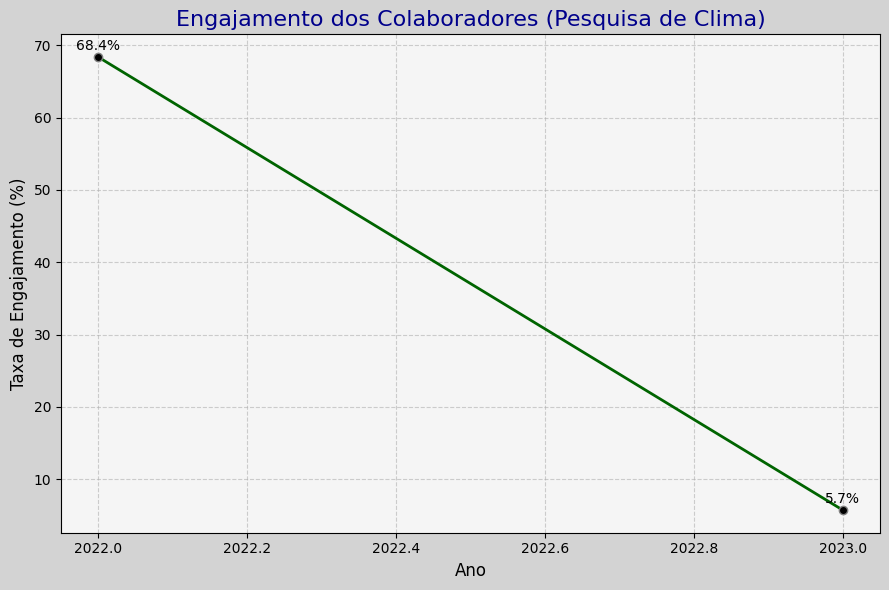

In [10]:
grafico_engajamento_colaboradores(df_rh)